Problem Description
Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

Dataset Description
A zipped file containing train, test and sample submission files are given. The training dataset consists of data corresponding to 52310 customers and the test dataset consists of 22421 customers. Following are the features of the dataset

1. Target: Claim Status (Claim)
2. Name of agency (Agency) - Categorical
3. Type of travel insurance agencies (Agency.Type) - Categorical
4. Distribution channel of travel insurance agencies  - Categorical
5. Name of the travel insurance products (Product.Name) - Categorical
6. Duration of travel (Duration)
7. Destination of travel (Destination)
8. Amount of sales of travel insurance policies (Net.Sales)
9. The commission received for travel insurance agency (Commission)
10. Age of insured (Age)
11. The identification record of every observation (ID)





Given the above data, we have to predict whether to sanction an insurance claim or not. The data contains high number of categorical features and a few redundant features as well. We will go through each step of the data analysis process.

In [1]:
#importing basic useful libraries to load and visualise dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [3]:
df_train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [4]:
df_test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32


First, lets check all the categorical features and understand how many categories we have

In [5]:
df_train['Agency'].value_counts()

EPX    26218
C2B    10615
CWT     6813
JZI     4619
LWC      806
SSI      780
JWT      550
RAB      527
TST      394
KML      313
ART      223
CCR      156
TTW      104
CBH       76
CSR       60
ADM       56
Name: Agency, dtype: int64

We have 16 agencies, distributed among Travel Agency and Airlines types an functioning among online and offline channels. Lets check the distribution of agencies among agency types and distribution channels

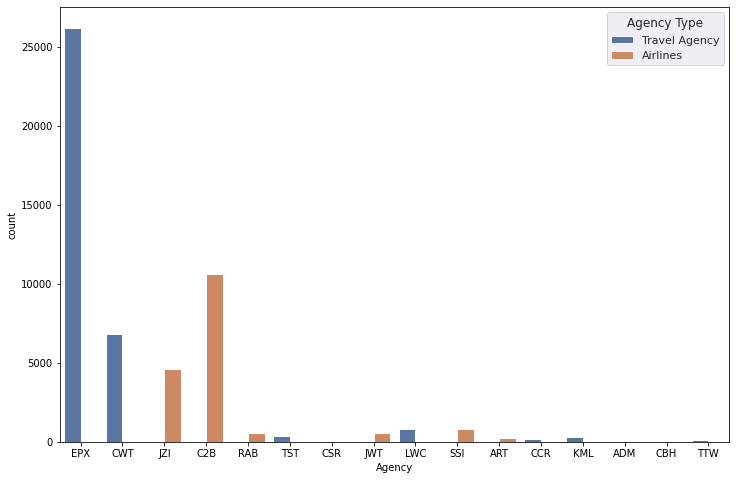

In [6]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Agency', hue = 'Agency Type', data = df_train, ax = ax)

As seen in the above plot, we have 6 airlines and 10 travel agencies we are dealing with. EXP and CWT amounts to highest numbers among agencies and JZIO and C2B among Airlines. 

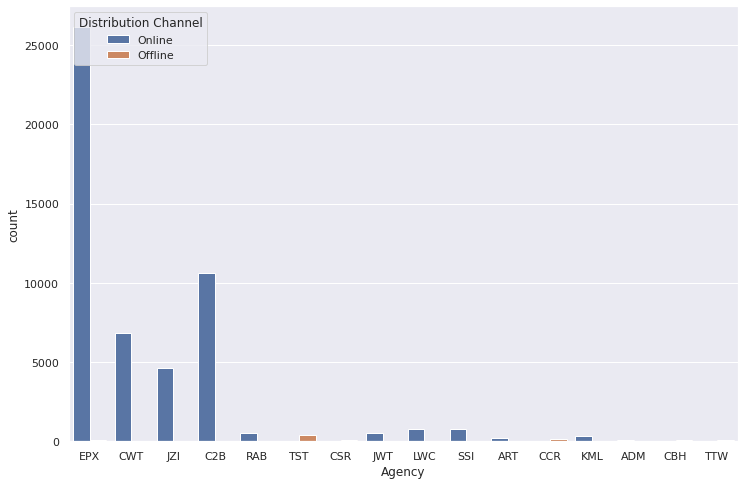

In [7]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Agency', hue = 'Distribution Channel', data = df_train, ax = ax)

The baove graph shows how both agencies and airlines are conducting online distribution over offline. Similarly if we check the df_test datast, we will find similar pattern. We can see from the above graphs that the claim ratio is mainly dominated by online distribution and among agencies. Airlines have lower contributions compared to agencies. To confirm this, we will plot the net sales across agency types

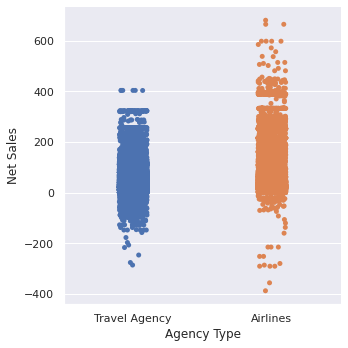

In [8]:
sns.catplot(x="Agency Type", y="Net Sales", data=df_train)

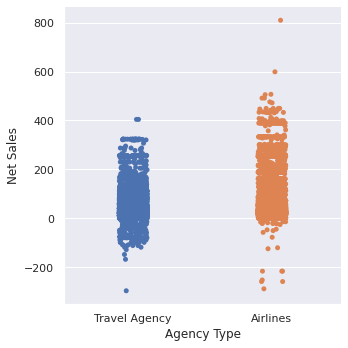

In [9]:
sns.catplot(x="Agency Type", y="Net Sales", data=df_test)

As seen in both the charts above, Airlines have higher number of sales compared to agencies. Airlines also tend to make high value sales 

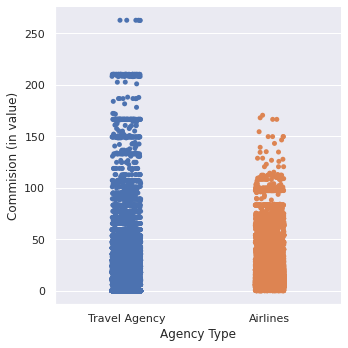

In [10]:
sns.catplot(x="Agency Type", y="Commision (in value)", data=df_train)

In [11]:
df_train.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim'],
      dtype='object')

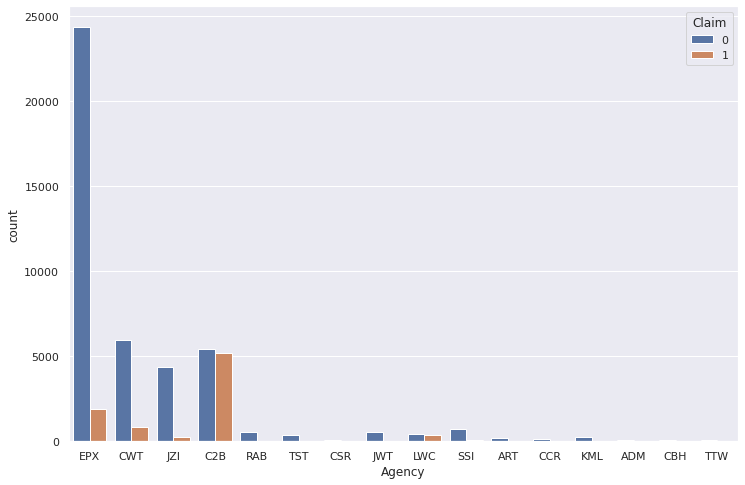

In [12]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Agency', hue = 'Claim', data = df_train, ax = ax)

However, if we look at comissions, agengies tend to make a lot more than the airlines. Lets check the cliam ratio acorss features

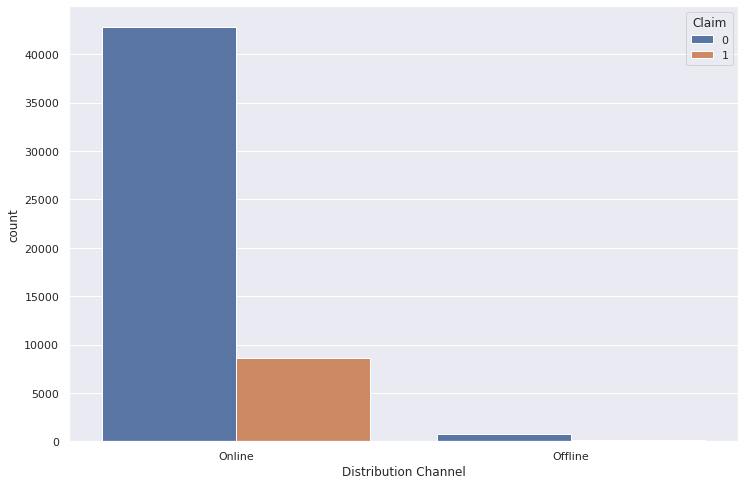

In [13]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Distribution Channel', hue = 'Claim', data = df_train, ax = ax)

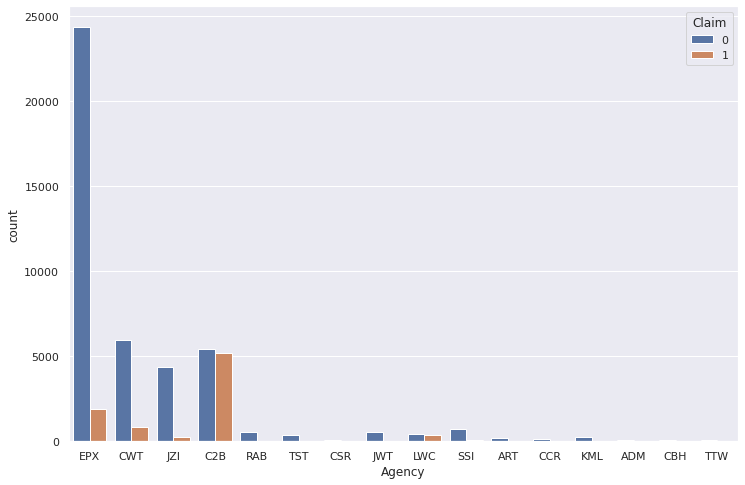

In [14]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Agency', hue = 'Claim', data = df_train, ax = ax)

The above chart shows how the claims rate is higher among airlines and majorly dominated by online distributions. We will also check for claim rates among product type since there are 25 products and the chart wont display all of those accurately

In [15]:
product_claim = pd.pivot_table(df_train,index=["Product Name"],values=["Claim"],aggfunc=np.sum)
product_claim.sort_values(by = ['Claim'], ascending = False)

,Claim
Product Name,
Bronze Plan,2020
2 way Comprehensive Plan,1457
Annual Silver Plan,1451
Silver Plan,1384
Rental Vehicle Excess Insurance,848
Cancellation Plan,355
Basic Plan,246
Annual Gold Plan,172
Gold Plan,143


The Above pivot table shows descending order of clims per product. Bronze Plan, 2 way Comprehensive Plan, Annual Silver Plan, Silver Plan, Rental Vehicle Excess Insurance amounts to over 82% of insurance claims. Lets also check the same for destinations to see which countries amounts to highest claims

In [16]:
country_claim = pd.pivot_table(df_train,index=["Destination"],values=["Claim"],aggfunc=np.sum)
country_claim.sort_values(by = ['Claim'], ascending = False)

,Claim
Destination,
SINGAPORE,5306
CHINA,642
THAILAND,458
AUSTRALIA,455
UNITED STATES,444
...,...
IRELAND,0
HUNGARY,0
GUAM,0


The above pivot shows claims among 97 countries. However 92% claims have occured among top 10 countries : Singapore, China, Thailand, Australia, US, Malaysia, UK, Japan, Korea and Hong Kong. the remaining 87 countries only amounts to 8% claims in our train dataset. The test dataset also shows similar trend

We also wish to check distribution of claim rates among different age groups and  duration of flight. FOr that we will have to create separate coulmns for those breaks. We will creat dummies for all categorical variables to have the entire dataset in 0 or 1 values which will be useful and mandatory to execute any preduction models later

In [17]:
pd.qcut(df_train['Age'], q =4).head(10)

0      (36.0, 43.0]
1      (33.0, 36.0]
2     (43.0, 118.0]
3     (43.0, 118.0]
4      (33.0, 36.0]
5      (36.0, 43.0]
6      (33.0, 36.0]
7      (36.0, 43.0]
8      (33.0, 36.0]
9    (-0.001, 33.0]
Name: Age, dtype: category
Categories (4, interval[float64]): [(-0.001, 33.0] < (33.0, 36.0] < (36.0, 43.0] < (43.0, 118.0]]

In [18]:
df_train['Age_band'] = pd.qcut(df_train.Age, q=4, labels=['<33', '33-36','36-43', '<43']) 
df_train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age_band
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0,36-43
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0,33-36
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0,<43
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0,<43
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0,33-36


In [19]:
df_train['Age_band'].value_counts()

33-36    20958
<33      13157
<43      12715
36-43     5480
Name: Age_band, dtype: int64

In [20]:
pd.qcut(df_test['Age'], q =4).head(10)

0     (34.0, 36.0]
1     (34.0, 36.0]
2    (0.999, 34.0]
3     (34.0, 36.0]
4    (0.999, 34.0]
5     (36.0, 43.0]
6     (34.0, 36.0]
7    (0.999, 34.0]
8    (43.0, 118.0]
9     (34.0, 36.0]
Name: Age, dtype: category
Categories (4, interval[float64]): [(0.999, 34.0] < (34.0, 36.0] < (36.0, 43.0] < (43.0, 118.0]]

In [21]:
df_test['Age_band'] = pd.qcut(df_test.Age, q=4, labels=['<34', '34-36','36-43', '<43']) 
df_test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Age_band
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36,34-36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36,34-36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24,<34
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36,34-36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32,<34


In [22]:
df_test['Age_band'].value_counts()

34-36    8630
<34      5896
<43      5605
36-43    2290
Name: Age_band, dtype: int64

In the above two cells, we created a column as Age_Band and insterted values based on classification in AGe column

Lets check the claim numbers based these age bands we created

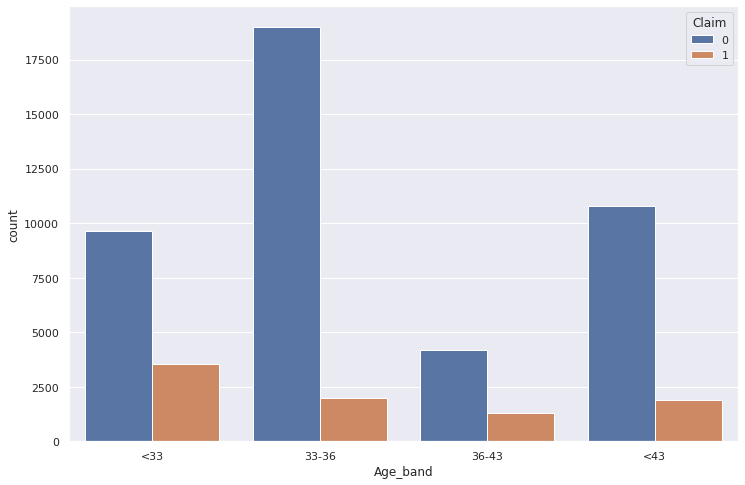

In [23]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Age_band', hue = 'Claim', data = df_train, ax = ax)

The plot shows the highest claims ratio is among 36-43 age group

In [24]:
pd.qcut(df_train['Duration'], q =4).head(10)

0    (57.0, 4881.0]
1    (-2.001, 10.0]
2      (24.0, 57.0]
3      (10.0, 24.0]
4      (10.0, 24.0]
5    (-2.001, 10.0]
6    (57.0, 4881.0]
7      (24.0, 57.0]
8      (10.0, 24.0]
9    (-2.001, 10.0]
Name: Duration, dtype: category
Categories (4, interval[float64]): [(-2.001, 10.0] < (10.0, 24.0] < (24.0, 57.0] < (57.0, 4881.0]]

In [25]:
df_train['Duration_interval'] = pd.qcut(df_train.Duration, q=4, labels=['<10', '10-24','24-57', '<57']) 
df_train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age_band,Duration_interval
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0,36-43,<57
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0,33-36,<10
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0,<43,24-57
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0,<43,10-24
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0,33-36,10-24


In [26]:
df_train['Duration_interval'].value_counts()

<10      13659
<57      13059
24-57    12800
10-24    12792
Name: Duration_interval, dtype: int64

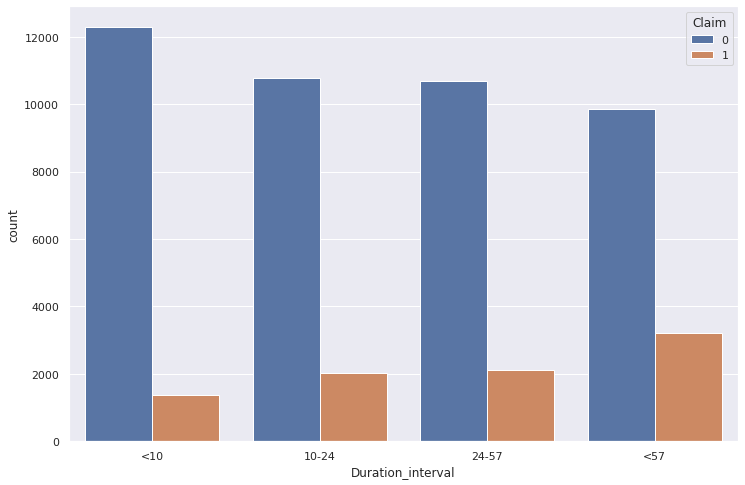

In [27]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Duration_interval', hue = 'Claim', data = df_train, ax = ax)

In [28]:
pd.qcut(df_test['Duration'], q =4).head(10)
df_test['Duration_interval'] = pd.qcut(df_test.Duration, q=4, labels=['<10', '10-24','24-57', '<57']) 
df_test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Age_band,Duration_interval
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36,34-36,<57
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36,34-36,<10
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24,<34,10-24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36,34-36,<57
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32,<34,<10


In [29]:
df_test['Duration_interval'].value_counts()

<10      5849
24-57    5532
<57      5524
10-24    5516
Name: Duration_interval, dtype: int64

In [30]:
df_train = df_train.rename({'Commision (in value)' : 'Comission'}, axis = 'columns')
df_test = df_test.rename({'Commision (in value)' : 'Comission'}, axis = 'columns')
df_train = df_train.rename({'Net Sales' : 'Net_Sales'}, axis = 'columns')
df_test = df_test.rename({'Net Sales' : 'Net_Sales'}, axis = 'columns')

In [31]:
df_train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net_Sales,Comission,Age,Claim,Age_band,Duration_interval
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0,36-43,<57
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0,33-36,<10
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0,<43,24-57
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0,<43,10-24
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0,33-36,10-24


In [32]:
df_train.dtypes

ID                         int64
Agency                    object
Agency Type               object
Distribution Channel      object
Product Name              object
Duration                   int64
Destination               object
Net_Sales                float64
Comission                float64
Age                        int64
Claim                      int64
Age_band                category
Duration_interval       category
dtype: object

In [33]:
df_train['Comission'] = df_train['Comission'].astype('int')
df_train['Net_Sales'] = df_train['Net_Sales'].astype('object')
df_test['Comission'] = df_test['Comission'].astype('int')
df_test['Net_Sales'] = df_test['Net_Sales'].astype('object')

In [34]:
pd.qcut(df_train['Net_Sales'], q =4).head(10)


0    (-389.001, 19.8]
1    (-389.001, 19.8]
2    (-389.001, 19.8]
3        (19.8, 29.5]
4        (29.5, 55.0]
5        (19.8, 29.5]
6       (55.0, 682.0]
7        (19.8, 29.5]
8        (29.5, 55.0]
9        (19.8, 29.5]
Name: Net_Sales, dtype: category
Categories (4, interval[float64]): [(-389.001, 19.8] < (19.8, 29.5] < (29.5, 55.0] < (55.0, 682.0]]

In [35]:
df_train['Net_Sales_Interval'] = pd.qcut(df_train.Net_Sales, q=4, labels=['<20', '20-29','30-55', '<55']) 
df_train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net_Sales,Comission,Age,Claim,Age_band,Duration_interval,Net_Sales_Interval
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12,0,41,0,36-43,<57,<20
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17,0,35,0,33-36,<10,<20
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11,47,0,<43,24-57,<20
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27,0,48,0,<43,10-24,20-29
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37,0,36,0,33-36,10-24,30-55


In [36]:
df_train['Net_Sales_Interval'].value_counts()

<20      13193
<55      13061
20-29    13059
30-55    12997
Name: Net_Sales_Interval, dtype: int64

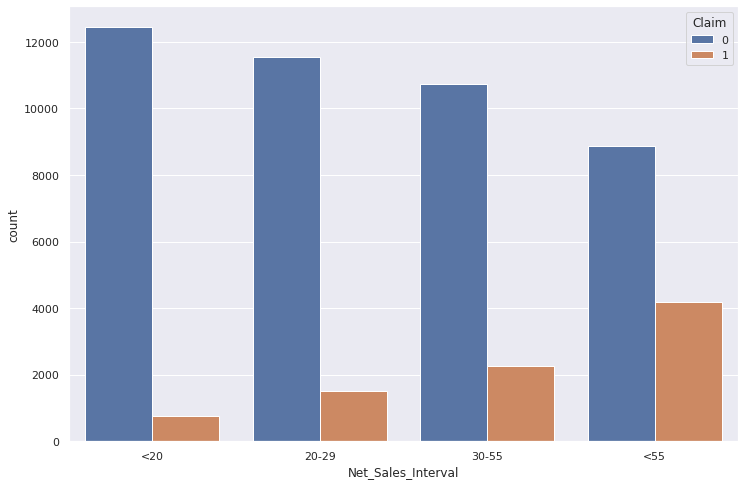

In [37]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Net_Sales_Interval', hue = 'Claim', data = df_train, ax = ax)

In [38]:
pd.qcut(df_test['Net_Sales'], q =4).head(10)


0    (-297.001, 19.8]
1      (19.8, 29.519]
2    (-297.001, 19.8]
3      (29.519, 56.0]
4      (29.519, 56.0]
5    (-297.001, 19.8]
6      (19.8, 29.519]
7       (56.0, 810.0]
8    (-297.001, 19.8]
9      (29.519, 56.0]
Name: Net_Sales, dtype: category
Categories (4, interval[float64]): [(-297.001, 19.8] < (19.8, 29.519] < (29.519, 56.0] < (56.0, 810.0]]

In [39]:
df_test['Net_Sales_Interval'] = pd.qcut(df_test.Net_Sales, q=4, labels=['<20', '20-29','30-56', '<56']) 
df_test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net_Sales,Comission,Age,Age_band,Duration_interval,Net_Sales_Interval
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18,0,36,34-36,<57,<20
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20,0,36,34-36,<10,20-29
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3,24,<34,10-24,<20
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41,0,36,34-36,<57,30-56
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30,7,32,<34,<10,30-56


In [40]:
df_test['Net_Sales_Interval'].value_counts()

<20      5688
30-56    5618
<56      5592
20-29    5523
Name: Net_Sales_Interval, dtype: int64

In [46]:
df_train['Comission_band'] = 0
df_train['Comission_band'] = df_train['Comission'].apply(lambda x: 1 if x<=0 else 2 if 0<x<26 else 3 ) 
df_train['Comission_band'].value_counts()

1    26611
2    18104
3     7595
Name: Comission_band, dtype: int64

In [49]:
df_test['Comission_band'] = 0
df_test['Comission_band'] = df_test['Comission'].apply(lambda x: 1 if x<=0 else 2 if 0<x<26 else 3 ) 
df_test['Comission_band'].value_counts()

1    11421
2     7687
3     3313
Name: Comission_band, dtype: int64

In [48]:
df_train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net_Sales,Comission,Age,Claim,Age_band,Duration_interval,Net_Sales_Interval,Comission_band
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12,0,41,0,36-43,<57,<20,1
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17,0,35,0,33-36,<10,<20,1
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11,47,0,<43,24-57,<20,2
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27,0,48,0,<43,10-24,20-29,1
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37,0,36,0,33-36,10-24,30-55,1


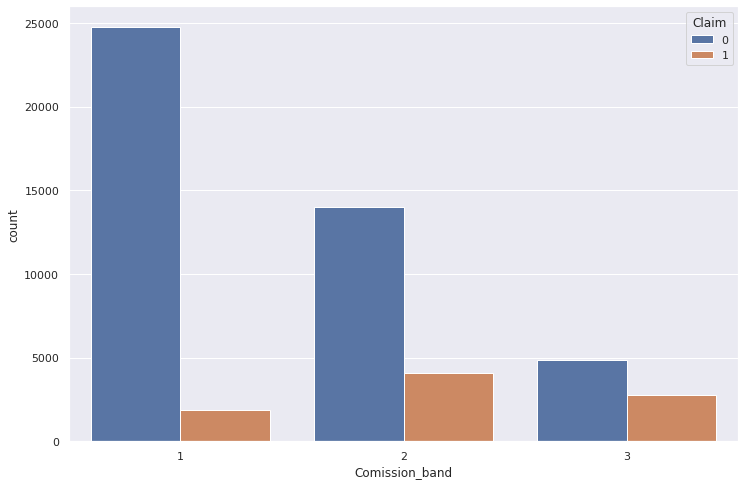

In [50]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Comission_band', hue = 'Claim', data = df_train, ax = ax)